# Use pandas to process data using several basic operations

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Append and Concatenate (rows) DataFrames

In [304]:
# read input file
input_file1 = 'data/pandas_data_example1.csv'
input_file2 = 'data/pandas_data_example2.csv'
orders1 = pd.read_csv(input_file1, encoding='utf-8-sig')
orders2 = pd.read_csv(input_file2, encoding='utf-8-sig')

# concatenate one dataframe to another dataframe
orders = pd.concat([orders1, orders2], axis=0, ignore_index=True)
print '\nData after contenating:\n', orders

# append one row to the dataframe
row = orders.iloc[0]
orders = orders.append(row, ignore_index=True)
print '\nData after appending:\n', orders.tail(10)

# delete the last row from the dataframe
orders.drop(orders.index[len(orders.index)-1], inplace=True)
print '\nData after deleting:\n', orders.tail(10)


Data after contenating:
    Origin Destination  Quantity      Departure        Arrival
0       AA         ABC        24    1/3/17 4:00   1/5/17 23:24
1       AA         ABC        24    1/3/17 4:00   1/5/17 23:24
2       AA         ABC        24    1/3/17 4:00   1/5/17 23:24
3       AA         ABC        12    1/3/17 4:00  1/19/17 15:42
4       AA         ABC        96    1/3/17 4:00  1/12/17 20:09
5       AA         ABC        12    1/3/17 4:00   1/5/17 23:24
6       AA         ABC        48    1/3/17 4:00  1/20/17 20:10
7       AA         ABC       144    1/4/17 4:00  1/12/17 20:09
8       AA         ABC        36    1/9/17 4:00  1/12/17 20:09
9       AA         ABC        54   1/10/17 4:00  1/12/17 20:09
10      AA         ABC        12   1/10/17 4:00  1/26/17 20:10
11      AA         ABC        18   1/10/17 4:00  1/12/17 20:09
12      AA         ABC        50   1/16/17 4:00  1/26/17 20:10
13      AA         ABC        84   1/17/17 4:00  1/19/17 15:42
14      AA         ABC        

### Update column names and Obtain the set of unique values of a particular column

In [305]:
# print DataFrame information
print '\nIndex names:\n', orders.index
print '\nColumns names:\n', orders.columns
print '\nDataFrame values:\n', orders.values

# update column name
newColumns = {'Departure': 'Departure_Time', 'Arrival': 'Arrival_Time'}
orders.rename(columns=newColumns, inplace=True)
print '\nColumns names:\n', orders.columns

# print the set of unique values of a particular column
originSet = orders['Origin'].unique()
destinationSet = orders['Destination'].unique()
print '\nOrigin Set:\n', originSet
print '\nDestination Set:\n', destinationSet
print '\nExample rows of original data:\n', orders.head(4)
print orders.tail(4)


Index names:
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            819, 820, 821, 822, 823, 824, 825, 826, 827, 828],
           dtype='int64', length=829)

Columns names:
Index([u'Origin', u'Destination', u'Quantity', u'Departure', u'Arrival'], dtype='object')

DataFrame values:
[[u'AA' u'ABC' 24 u'1/3/17 4:00' u'1/5/17 23:24']
 [u'AA' u'ABC' 24 u'1/3/17 4:00' u'1/5/17 23:24']
 [u'AA' u'ABC' 24 u'1/3/17 4:00' u'1/5/17 23:24']
 ..., 
 [u'DD' u'STU' 60 u'1/30/17 11:55' u'2/9/17 19:28']
 [u'DD' u'STU' 180 u'2/13/17 4:00' u'2/17/17 19:26']
 [u'DD' u'STU' 82 u'2/20/17 4:00' u'2/27/17 19:50']]

Columns names:
Index([u'Origin', u'Destination', u'Quantity', u'Departure_Time',
       u'Arrival_Time'],
      dtype='object')

Origin Set:
[u'AA' u'BB' u'CC' u'DD']

Destination Set:
[u'ABC' u'DEF' u'GHI' u'JKL' u'MNO' u'PQR' u'VWX' u'STU']

Example rows of original data:
  Origin Destination  Quantity Departure_Time   Arrival_Time
0     AA         ABC        24

### Iterate through the DataFrame

In [306]:
for index, row in orders.iterrows():
    if row['Destination'] == 'GHI':
        print index, row['Origin'], row['Destination'], row['Quantity']

384 AA GHI 272
385 BB GHI 198
386 BB GHI 168
387 BB GHI 60
388 BB GHI 24
389 CC GHI 66
390 CC GHI 6
391 CC GHI 54
392 CC GHI 120
393 CC GHI 187
394 CC GHI 114
395 CC GHI 60
396 CC GHI 90
397 CC GHI 402
398 CC GHI 58
399 CC GHI 18


### Obtain the origins with the largest quantities

In [307]:
ordersByOrigin = orders.groupby(by=['Origin'])['Quantity'].sum().reset_index()
ordersByOrigin.sort_values(by=['Quantity'], ascending=False, inplace=True)
origins = ordersByOrigin.head(3)['Origin']
print origins.values

[u'CC' u'DD' u'BB']


### Apply function to a particular column

In [308]:
## apply function to a particular column
newOriginSet = ['AAAA', 'BBBB', 'CCCC', 'DDDD']
originMap = {x : y for (x, y) in zip(originSet, newOriginSet)} # dict(zip(originSet, newOriginSet))
orders['Origin'] = orders['Origin'].apply(lambda x: originMap[x] if x in originMap else x)
print '\nData after updating column names:\n', orders.iloc[0:4]


Data after updating column names:
  Origin Destination  Quantity Departure_Time   Arrival_Time
0   AAAA         ABC        24    1/3/17 4:00   1/5/17 23:24
1   AAAA         ABC        24    1/3/17 4:00   1/5/17 23:24
2   AAAA         ABC        24    1/3/17 4:00   1/5/17 23:24
3   AAAA         ABC        12    1/3/17 4:00  1/19/17 15:42


### Filter data under some criteria

In [310]:
## filter data
destinationSet = ['DEF', 'GHI', 'JKL', 'MNO', 'PQR', 'STU']
destinationFilter = orders['Destination'].isin(destinationSet)
quantityFilter = orders['Quantity']>=5
orders = orders.loc[destinationFilter & quantityFilter]
print '\nData after filtering:\n', orders.iloc[0:4]


Data after filtering:
    Origin Destination  Quantity Departure_Time   Arrival_Time
370   AAAA         DEF         8  1/24/17 16:00   2/1/17 13:54
371   AAAA         DEF        75    2/2/17 9:27   2/9/17 10:32
372   AAAA         DEF        15  2/24/17 10:37   3/3/17 19:00
373   BBBB         DEF        28  1/24/17 16:00  1/30/17 19:41


### Operate on Datatimelike columns

In [311]:
## operate on Datatimelike columns
departureTime = pd.to_datetime(orders['Departure_Time'], errors='coerce')
arrivalTime = pd.to_datetime(orders['Arrival_Time'], errors='coerce')
travelTime = (arrivalTime - departureTime).astype('timedelta64[s]')/(3600.0*24.0)
print '\nDeparture time series:\n', departureTime[0:4]


Departure time series:
370   2017-01-24 16:00:00
371   2017-02-02 09:27:00
372   2017-02-24 10:37:00
373   2017-01-24 16:00:00
Name: Departure_Time, dtype: datetime64[ns]


### Add and Drop columns to the DataFrame

In [313]:
## drop columns from the DataFrame
quantity = orders['Quantity']
orders.drop('Quantity', axis=1, inplace=True)
print '\nData after droping columns:\n', orders.head(5)

## add columns to the DataFrame
orders.loc[:, 'Quantity'] = quantity
orders.loc[:, 'Travel_Time'] = travelTime
orders.loc[:, 'Departure_Date'] = departureTime.dt.date # just keep the date part
orders.loc[:, 'Departure_Week'] = departureTime.dt.week # the week of year, index starting from 1
orders.loc[:, 'Departure_DayOfWeek'] = departureTime.dt.dayofweek # the day of week, e.g., 0-Mon, 4-Thu
orders.loc[:, 'Arrival_Date'] = arrivalTime.dt.date
orders.loc[:, 'Arrival_Week'] = arrivalTime.dt.week
orders.loc[:, 'Arrival_DayOfWeek'] = arrivalTime.dt.dayofweek
dayOfWeek = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
orders['Departure_DayOfWeek'] = orders['Departure_DayOfWeek'].apply(lambda x : dayOfWeek[x])
orders['Arrival_DayOfWeek'] = orders['Arrival_DayOfWeek'].apply(lambda x : dayOfWeek[x])

print '\nData after adding columns:\n', orders.head(5)


Data after droping columns:
    Origin Destination Departure_Time   Arrival_Time  Travel_Time  \
370   AAAA         DEF  1/24/17 16:00   2/1/17 13:54     7.912500   
371   AAAA         DEF    2/2/17 9:27   2/9/17 10:32     7.045139   
372   AAAA         DEF  2/24/17 10:37   3/3/17 19:00     7.349306   
373   BBBB         DEF  1/24/17 16:00  1/30/17 19:41     6.153472   
374   BBBB         DEF  1/27/17 13:50   2/1/17 22:00     5.340278   

    Departure_Date  Departure_Week Departure_DayOfWeek Arrival_Date  \
370     2017-01-24               4                 Tue   2017-02-01   
371     2017-02-02               5                 Thu   2017-02-09   
372     2017-02-24               8                 Fri   2017-03-03   
373     2017-01-24               4                 Tue   2017-01-30   
374     2017-01-27               4                 Fri   2017-02-01   

     Arrival_Week Arrival_DayOfWeek  
370             5               Wed  
371             6               Thu  
372            

### Pivot tables

In [314]:
## Construct a pivot table, something like unstack function
tempOrders = orders[['Origin','Destination','Quantity','Departure_Week']]
pivotTable = pd.pivot_table(tempOrders, values='Quantity', index=['Origin','Destination'], columns=['Departure_Week'])
pivotTable.fillna(value=0.0, inplace=True)
print pivotTable

Departure_Week               1           2       3           4           5  \
Origin Destination                                                           
AAAA   DEF            0.000000    0.000000    0.00    8.000000   75.000000   
       GHI            0.000000    0.000000  272.00    0.000000    0.000000   
       MNO            0.000000   42.000000    7.50   27.000000    0.000000   
       PQR          120.000000    0.000000    0.00    0.000000    0.000000   
       STU            0.000000    0.000000   64.00  240.000000   60.000000   
BBBB   DEF            0.000000    0.000000    0.00   23.000000   75.000000   
       GHI            0.000000    0.000000  183.00    0.000000    0.000000   
       JKL            0.000000   60.000000   22.75   43.000000   67.333333   
       MNO           18.000000   22.500000   24.00    0.000000   11.250000   
       PQR           97.666667   32.500000    0.00   27.333333    0.000000   
       STU            0.000000   64.000000    0.00  484.000000  

### Sort w.r.t. columns, (1) default order; (2) customized order

In [315]:
## sort w.r.t. columns in default order: numeric/time/alphabetical
orders.sort_values(by=['Origin', 'Destination', 'Departure_Time'], inplace=True)
print '\nData after sorting:\n', orders[['Origin','Destination','Quantity','Departure_Time','Arrival_Time']]

## sort w.r.t. columns in customized order:
dayOfWeek = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sortedOrders = orders.groupby(by=['Origin','Destination','Departure_DayOfWeek'])['Quantity'].sum().reset_index()

# order by Departure_DayOfWeek
sortedOrders['Departure_DayOfWeek'] = sortedOrders['Departure_DayOfWeek'].astype('category')
sortedOrders['Departure_DayOfWeek'].cat.set_categories(dayOfWeek, inplace=True)
sortedOrders.sort_values(by=['Origin','Destination','Departure_DayOfWeek'], ascending=[True, True, True], inplace=True)
print '\nData after sorting:\n', sortedOrders


Data after sorting:
    Origin Destination  Quantity Departure_Time   Arrival_Time
370   AAAA         DEF         8  1/24/17 16:00   2/1/17 13:54
371   AAAA         DEF        75    2/2/17 9:27   2/9/17 10:32
372   AAAA         DEF        15  2/24/17 10:37   3/3/17 19:00
384   AAAA         GHI       272   1/16/17 4:00   1/20/17 1:21
515   AAAA         MNO        42   1/12/17 4:00  1/17/17 11:26
516   AAAA         MNO         6   1/19/17 4:00  1/24/17 10:52
517   AAAA         MNO         9   1/19/17 4:00  1/24/17 10:52
518   AAAA         MNO        27   1/26/17 3:39    2/1/17 8:33
519   AAAA         MNO        21   2/23/17 4:00  2/28/17 10:38
571   AAAA         PQR       120    1/5/17 4:00  1/16/17 19:09
572   AAAA         PQR        72    2/9/17 4:00   2/16/17 8:25
573   AAAA         PQR         5    2/9/17 4:00  2/17/17 18:56
574   AAAA         PQR        24    2/9/17 4:00   2/16/17 8:25
789   AAAA         STU        64   1/16/17 4:00   1/24/17 0:14
790   AAAA         STU       240  

### Groupby functions: (1) single groupby; (2) multiple groupby

In [316]:
# use of single groupby function
ordersByOriDesPair = orders.groupby(by=['Origin', 'Destination'])['Quantity'].sum().reset_index()
print '\nData after group by single function:\n', ordersByOriDesPair

# use of multiple groupby functions
# Pandas includes multiple built in functions such as sum/mean/std/max/min
groupByFuns = {'Quantity': ['sum'], 'Travel_Time': ['mean', 'std']}
ordersByMultiGroupby = orders.groupby(by=['Origin', 'Destination']).agg(groupByFuns).reset_index()
ordersByMultiGroupby.fillna(0.0, inplace=True)

# # drop the outermost level from the hierarchical column index
# ordersByMultiGroupby.columns = ordersByMultiGroupby.columns.droplevel(0)

# form multi-level column labels
newLabels = ['_'.join(col) for col in ordersByMultiGroupby.columns.ravel()]
ordersByMultiGroupby.columns = newLabels
print '\nData after group by multiple functions:\n', ordersByMultiGroupby


Data after group by single function:
   Origin Destination  Quantity
0    AAAA         DEF        98
1    AAAA         GHI       272
2    AAAA         MNO       105
3    AAAA         PQR       221
4    AAAA         STU       616
5    BBBB         DEF       136
6    BBBB         GHI       450
7    BBBB         JKL      1138
8    BBBB         MNO       230
9    BBBB         PQR       716
10   BBBB         STU      1068
11   CCCC         DEF        15
12   CCCC         GHI      1175
13   CCCC         JKL      1944
14   CCCC         MNO      1820
15   CCCC         PQR      6201
16   CCCC         STU       976
17   DDDD         DEF       482
18   DDDD         JKL      3565
19   DDDD         MNO       132
20   DDDD         PQR       840
21   DDDD         STU      2339

Data after group by multiple functions:
   Origin_ Destination_  Travel_Time_mean  Travel_Time_std  Quantity_sum
0     AAAA          DEF          7.435648         0.440080            98
1     AAAA          GHI          3.8895

### Unstack function

In [317]:
## unstack function
dayOfWeek = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ordersByOrigin = orders.groupby(by=['Origin', 'Departure_Week', 'Departure_DayOfWeek'])['Quantity'].sum().reset_index()

# order by Departure_DayOfWeek first
ordersByOrigin['Departure_DayOfWeek'] = ordersByOrigin['Departure_DayOfWeek'].astype('category')
ordersByOrigin['Departure_DayOfWeek'].cat.set_categories(dayOfWeek, inplace=True)

# unstack by Departure_DayOfWeek
unstackByDayofweek = ordersByOrigin.set_index(['Origin', 'Departure_Week', 'Departure_DayOfWeek'])
unstackByDayofweek = unstackByDayofweek.unstack('Departure_DayOfWeek')
unstackByDayofweek.fillna(0.0, inplace=True)
print '\nData unstacked by DayOfWeek:\n', unstackByDayofweek

# unstack by Departure_Week
unstackByWeek = ordersByOrigin.set_index(['Origin', 'Departure_DayOfWeek', 'Departure_Week'])
unstackByWeek = unstackByWeek.unstack('Departure_Week')
unstackByWeek.fillna(0.0, inplace=True)
print '\nData unstacked by Week:\n', unstackByWeek


Data unstacked by DayOfWeek:
                      Quantity                            
Departure_DayOfWeek        Mon    Tue    Wed     Thu   Fri
Origin Departure_Week                                     
AAAA   1                   0.0    0.0    0.0   120.0   0.0
       2                   0.0    0.0    0.0    42.0   0.0
       3                 336.0    0.0    0.0    15.0   0.0
       4                 240.0    8.0    0.0    27.0   0.0
       5                 120.0    0.0    0.0    75.0   0.0
       6                 144.0    0.0    0.0   101.0   0.0
       8                  48.0    0.0    0.0    21.0  15.0
BBBB   1                   0.0    0.0    0.0   311.0   0.0
       2                 184.0    0.0    0.0   110.0   0.0
       3                 444.0    0.0   88.0    64.0   0.0
       4                 619.0   28.0   80.0    82.0  18.0
       5                 519.0    0.0   74.0    93.0   0.0
       6                 109.0    0.0    0.0    88.0   0.0
       7                 1

### Merge function

In [318]:
## performing a database-style join operation by columns or indexes
orders1 = orders.loc[orders['Origin'].isin(['AAAA','BBBB'])]
orders2 = orders.loc[orders['Origin'].isin(['BBBB','CCCC'])]
newOrders = orders1.merge(orders2, how='inner', on=['Origin', 'Destination'])
print newOrders

     Origin Destination Departure_Time_x Arrival_Time_x  Travel_Time_x  \
0      BBBB         DEF    1/24/17 16:00  1/30/17 19:41       6.153472   
1      BBBB         DEF    1/24/17 16:00  1/30/17 19:41       6.153472   
2      BBBB         DEF    1/24/17 16:00  1/30/17 19:41       6.153472   
3      BBBB         DEF    1/24/17 16:00  1/30/17 19:41       6.153472   
4      BBBB         DEF    1/27/17 13:50   2/1/17 22:00       5.340278   
5      BBBB         DEF    1/27/17 13:50   2/1/17 22:00       5.340278   
6      BBBB         DEF    1/27/17 13:50   2/1/17 22:00       5.340278   
7      BBBB         DEF    1/27/17 13:50   2/1/17 22:00       5.340278   
8      BBBB         DEF      2/2/17 9:27    2/9/17 1:19       6.661111   
9      BBBB         DEF      2/2/17 9:27    2/9/17 1:19       6.661111   
10     BBBB         DEF      2/2/17 9:27    2/9/17 1:19       6.661111   
11     BBBB         DEF      2/2/17 9:27    2/9/17 1:19       6.661111   
12     BBBB         DEF    2/24/17 10:

### Weighted average function

In [319]:
## weighted average by built-in function
ordersByOriDesPair = orders.groupby(by=['Origin','Destination'])
avgByOriDesPair = ordersByOriDesPair.apply(lambda x : np.average(x['Travel_Time'], weights=x['Quantity'])).reset_index(name='Avg_Travel_Time')
print '\nWeighted average by built-in function:\n', avgByOriDesPair

## weighted average by customized function
def weighted_average(dataframe, value_column, weight_column):
    value = dataframe[value_column]
    weight = dataframe[weight_column]
    try:
        return (value*weight).sum()/weight.sum()
    except ZeroDivisionError:
        return value.mean()

ordersByOriDesPair = orders.groupby(by=['Origin','Destination'])
avgByOriDesPair = ordersByOriDesPair.apply(weighted_average, 'Travel_Time', 'Quantity').reset_index(name='Avg_Travel_Time')
print '\nWeighted average by customized function:\n', avgByOriDesPair


Weighted average by built-in function:
   Origin Destination  Avg_Travel_Time
0    AAAA         DEF         7.162500
1    AAAA         GHI         3.889583
2    AAAA         MNO         5.529683
3    AAAA         PQR         9.631347
4    AAAA         STU        12.381164
5    BBBB         DEF         6.364394
6    BBBB         GHI         4.183315
7    BBBB         JKL         7.350692
8    BBBB         MNO         5.412243
9    BBBB         PQR         9.683494
10   BBBB         STU        13.133232
11   CCCC         DEF         4.653472
12   CCCC         GHI         2.526194
13   CCCC         JKL         9.121866
14   CCCC         MNO         5.299845
15   CCCC         PQR        10.306777
16   CCCC         STU        16.437150
17   DDDD         DEF         6.146992
18   DDDD         JKL         7.190483
19   DDDD         MNO         5.251357
20   DDDD         PQR         9.820879
21   DDDD         STU        13.380976

Weighted average by customized function:
   Origin Destination

### Plot time series data

                Quantity
Departure_Time          
1/11/17 16:00         20
1/12/17 4:00         499
1/12/17 4:14          29
1/16/17 3:04         198
1/16/17 3:17          49


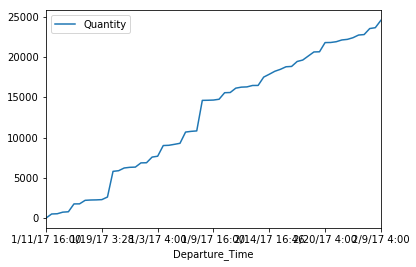

Origin          AAAA   BBBB   CCCC  DDDD
Departure_Time                          
1/11/17 16:00    0.0    0.0    0.0  20.0
1/12/17 4:00    42.0   81.0  346.0  30.0
1/12/17 4:14     0.0   29.0    0.0   0.0
1/16/17 3:04     0.0  198.0    0.0   0.0
1/16/17 3:17     0.0    0.0   49.0   0.0


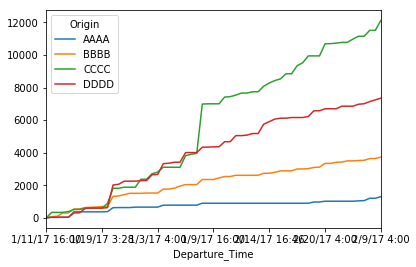

In [321]:
## plot one time series
ordersForAllTrips = orders.groupby(by=['Departure_Time'])['Quantity'].sum().reset_index()
ordersForAllTrips.set_index('Departure_Time', inplace=True)
ordersForAllTrips.cumsum().plot()
print ordersForAllTrips.head(5)
plt.show()

## plot multiple time series
ordersForIndiTrips = orders.groupby(by=['Origin','Departure_Time'])['Quantity'].sum().reset_index()
ordersForIndiTrips.set_index(['Departure_Time', 'Origin'], inplace=True)
# first unstack the data into the desired form
ordersForIndiTrips = ordersForIndiTrips.unstack('Origin')
ordersForIndiTrips.fillna(value=0.0, inplace=True)
ordersForIndiTrips.columns = ordersForIndiTrips.columns.droplevel(0)
ordersForIndiTrips.cumsum().plot()
print ordersForIndiTrips.head(5)
plt.show()